In [224]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [135]:
df = pd.read_csv('/users''/broda''/downloads''/Health_Heart.csv')

In [136]:
def categorize_age(df):
    df['Age_Group'] = pd.cut(df['Age'], bins=[0, 35, 50, 65, float('inf')], labels=['Young Adult', 'Middle-Aged', 'Senior', 'Elderly'])
    return df

In [137]:
numerical_features = ['Age']
target = 'Heart Disease'

In [138]:
preprocessor = Pipeline([
    ('scaler', StandardScaler())])

In [139]:
X = df[numerical_features]
y = df[target]

In [140]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [141]:
#print("Transformed Features:")
#print(X_scaled)
print("\nTarget Variable:")
print(y)


Target Variable:
0      Presence
1       Absence
2      Presence
3       Absence
4       Absence
         ...   
265     Absence
266     Absence
267     Absence
268     Absence
269    Presence
Name: Heart Disease, Length: 270, dtype: object


In [10]:
os.getcwd()

'C:\\Users\\broda\\Downloads'

In [116]:
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\broda\Downloads


In [142]:
Health_dataset = pd.read_csv('/users''/broda''/downloads''/Health_Heart.csv')

In [143]:
print(Health_dataset)

     Age  Gender  Chest pain type  Blood Pressure(mmHg)  Cholesterol  \
0     70       1                4                   130          322   
1     67       0                3                   115          564   
2     57       1                2                   124          261   
3     64       1                4                   128          263   
4     74       0                2                   120          269   
..   ...     ...              ...                   ...          ...   
265   52       1                3                   172          199   
266   44       1                2                   120          263   
267   56       0                2                   140          294   
268   57       1                4                   140          192   
269   67       1                4                   160          286   

     FBS over 120  EKG results  Max HR  Exercise angina  ST depression  \
0               0            2     109                0      

In [144]:
Health_dataset.head(5)

,Age,Gender,Chest pain type,Blood Pressure(mmHg),Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Heart Attack
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,0


In [145]:
print(Health_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Gender                   270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   Blood Pressure(mmHg)     270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
 14  Heart Attack             2

In [146]:
print(Health_dataset.columns)

Index(['Age', 'Gender', 'Chest pain type', 'Blood Pressure(mmHg)',
       'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR',
       'Exercise angina', 'ST depression', 'Slope of ST',
       'Number of vessels fluro', 'Thallium', 'Heart Disease', 'Heart Attack'],
      dtype='object')


In [147]:
def check_missing_values(dframe, columnlists):
    for col in columnlists:
        print(f' NAN in {col} : {dframe[col].isna().any()} ')

In [148]:
check_missing_values(Health_dataset, Health_dataset.columns)

 NAN in Age : False 
 NAN in Gender : False 
 NAN in Chest pain type : False 
 NAN in Blood Pressure(mmHg) : False 
 NAN in Cholesterol : False 
 NAN in FBS over 120 : False 
 NAN in EKG results : False 
 NAN in Max HR : False 
 NAN in Exercise angina : False 
 NAN in ST depression : False 
 NAN in Slope of ST : False 
 NAN in Number of vessels fluro : False 
 NAN in Thallium : False 
 NAN in Heart Disease : False 
 NAN in Heart Attack : False 


In [149]:
Health_dataset.shape

(270, 15)

In [150]:
pd.value_counts(Health_dataset.dtypes)

int64      13
float64     1
object      1
dtype: int64

In [129]:
#Health_dataset.select_dtypes(exclude="number").head()

In [130]:
#Health_dataset.describe(exclude="number")

In [131]:
# Assuming Health_dataset is your pandas DataFrame
#numeric_columns = Health_dataset.select_dtypes(include="number")

In [132]:
#numeric_columns.head()

In [151]:
Health_dataset.shape

(270, 15)

In [152]:
print(Health_dataset.describe())

              Age      Gender  Chest pain type  Blood Pressure(mmHg)  \
count  270.000000  270.000000       270.000000            270.000000   
mean    54.433333    0.677778         3.174074            131.344444   
std      9.109067    0.468195         0.950090             17.861608   
min     29.000000    0.000000         1.000000             94.000000   
25%     48.000000    0.000000         3.000000            120.000000   
50%     55.000000    1.000000         3.000000            130.000000   
75%     61.000000    1.000000         4.000000            140.000000   
max     77.000000    1.000000         4.000000            200.000000   

       Cholesterol  FBS over 120  EKG results      Max HR  Exercise angina  \
count   270.000000    270.000000   270.000000  270.000000       270.000000   
mean    249.659259      0.148148     1.022222  149.677778         0.329630   
std      51.686237      0.355906     0.997891   23.165717         0.470952   
min     126.000000      0.000000     0.

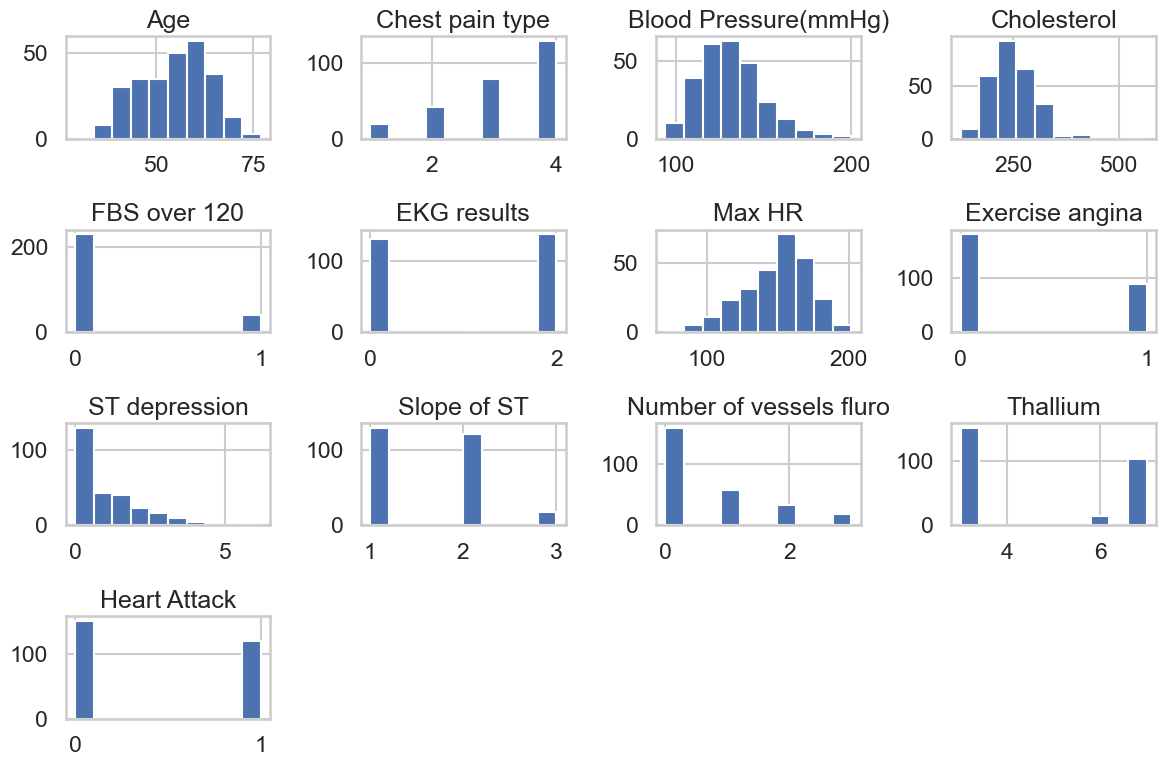

<Figure size 640x480 with 0 Axes>

In [267]:
Health_dataset.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()
plt.savefig('data_layout fig1.png')

In [191]:
#plt.figure(figsize=(10, 8))
#sns.boxplot(data=Health_dataset, x="Gender", y="Heart Attack",)
#plt.savefig('gender_chart.png')

In [190]:
#Health_dataset['Gender'] = Health_dataset['Gender'].map({0: 'Female', 1: 'Male'})

#plt.figure(figsize=(10, 8))
#sns.boxplot(data=Health_dataset, x="Gender", y="Heart Attack")
#plt.title('Distribution of Heart Attacks by Gender')

#plt.xlabel('Gender')
#plt.ylabel('Heart Attack')
#plt.show()

In [187]:
gender_counts = Health_dataset['Gender'].value_counts()

print(gender_counts)

Male      183
Female     87
Name: Gender, dtype: int64


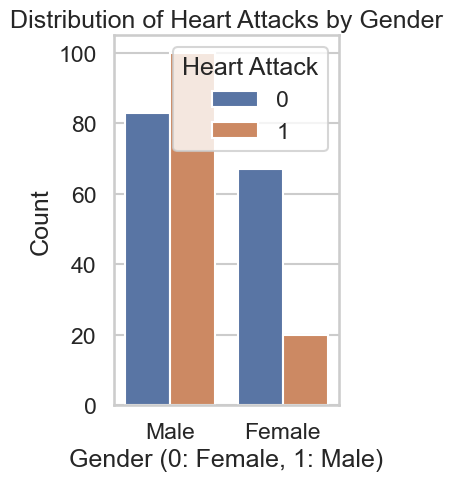

In [266]:
plt.subplot(1, 2, 2)
sns.countplot(data=Health_dataset, x='Gender', hue='Heart Attack')
plt.title('Distribution of Heart Attacks by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.savefig('heart_vs_gender fig2')

In [192]:
#sns.countplot(x='Gender', data=Health_dataset)
#plt.show()

In [160]:
correlation_with_target = Health_dataset.corr()['Heart Attack'].sort_values(ascending=False)
print(correlation_with_target)

Heart Attack               1.000000
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
ST depression              0.417967
Chest pain type            0.417436
Slope of ST                0.337616
Gender                     0.297721
Age                        0.212322
EKG results                0.182091
Blood Pressure(mmHg)       0.155383
Cholesterol                0.118021
FBS over 120              -0.016319
Max HR                    -0.418514
Name: Heart Attack, dtype: float64


C:\Users\broda\AppData\Local\Temp\ipykernel_26324\1375681080.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = Health_dataset.corr()['Heart Attack'].sort_values(ascending=False)


Text(0, 0.5, 'Count')

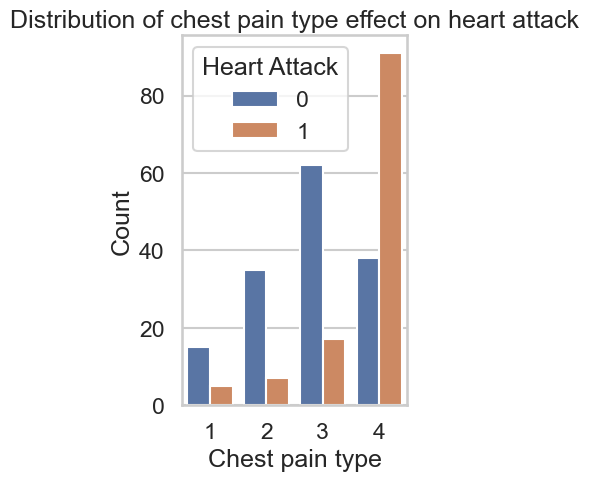

In [270]:
plt.subplot(1, 2, 2)
sns.countplot(data=Health_dataset, x='Chest pain type', hue='Heart Attack')
plt.title('Distribution of chest pain type effect on heart attack')
plt.ylabel('Count')

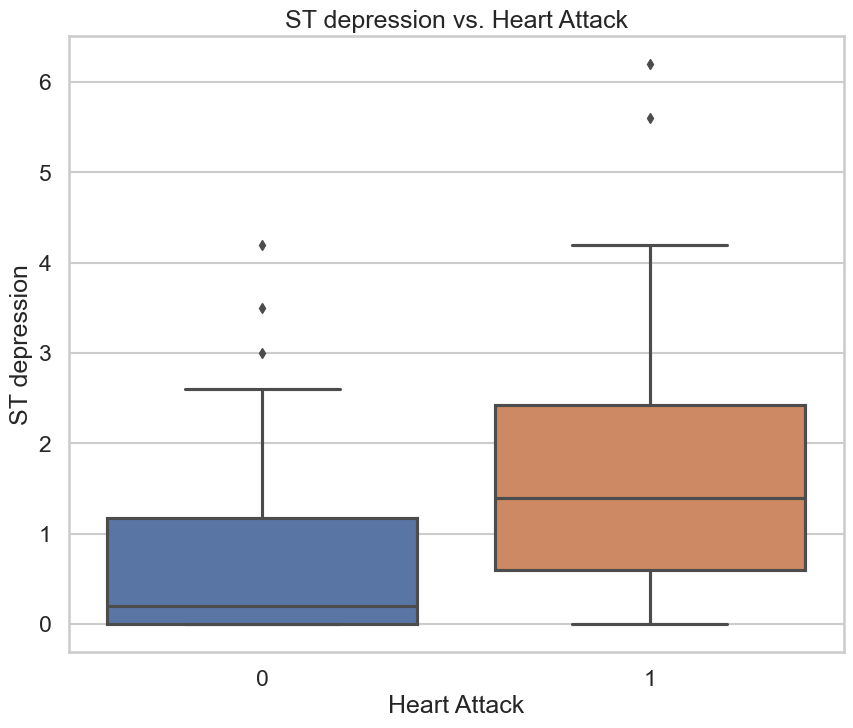

In [294]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Heart Attack', y='ST depression', data=Health_dataset)
plt.title('ST depression vs. Heart Attack')
plt.show()

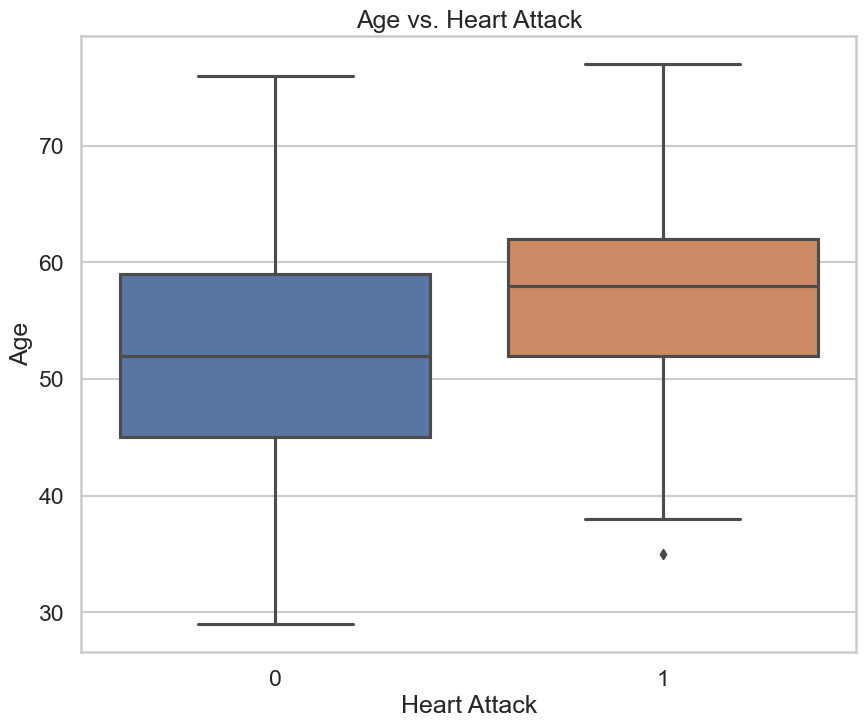

<Figure size 640x480 with 0 Axes>

In [229]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Heart Attack', y='Age', data=Health_dataset)
plt.title('Age vs. Heart Attack')
plt.show()
plt.savefig('age_heartattack fig3')

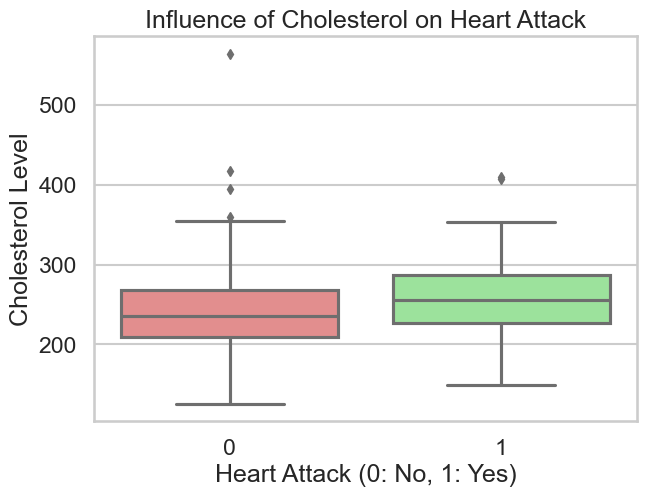

<Figure size 640x480 with 0 Axes>

In [230]:
sns.set_style("whitegrid")
sns.set_context("talk")

# Set the figure size
plt.figure(figsize=(7, 5))

# Plot boxplot
sns.boxplot(x='Heart Attack', y='Cholesterol', data=Health_dataset, palette=["lightcoral", "lightgreen"])

plt.title('Influence of Cholesterol on Heart Attack')
plt.xlabel('Heart Attack (0: No, 1: Yes)')
plt.ylabel('Cholesterol Level')

plt.show()
plt.savefig('chol_heart fig4')

In [203]:
#sns.countplot(x='Gender', hue='Heart Attack', data=Health_dataset)
#plt.title('Gender vs. Heart Attack')
#plt.show()

In [165]:
#sns.countplot(x='Smoker', hue='Heart Attack', data=Health_dataset)
#plt.title('Smoker vs. Heart Attack')
#plt.show()

In [222]:
#sns.countplot(x='Exercise angina', hue='Heart Attack', data=Health_dataset)
#plt.title('Heart Attack vs Exercise')
#plt.show()

In [216]:
exercise_counts = Health_dataset['Exercise angina'].value_counts()

print(exercise_counts)

0    181
1     89
Name: Exercise angina, dtype: int64


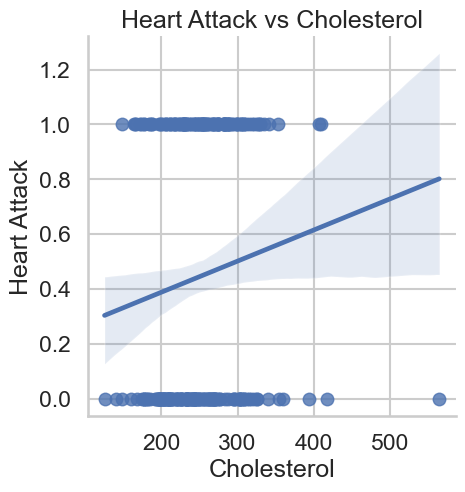

<Figure size 640x480 with 0 Axes>

In [231]:
sns.lmplot(x='Cholesterol', y='Heart Attack',data=Health_dataset) #hue='Heart Attack', )
plt.title('Heart Attack vs Cholesterol')
plt.show()
plt.savefig('chol_heart fig5')

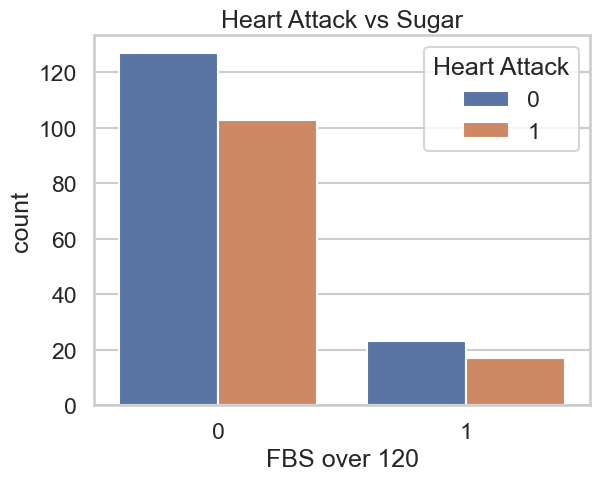

<Figure size 640x480 with 0 Axes>

In [233]:
sns.countplot(x='FBS over 120', hue='Heart Attack', data=Health_dataset)
plt.title('Heart Attack vs Sugar')
plt.show()
plt.savefig('sugarvsheart fig6')

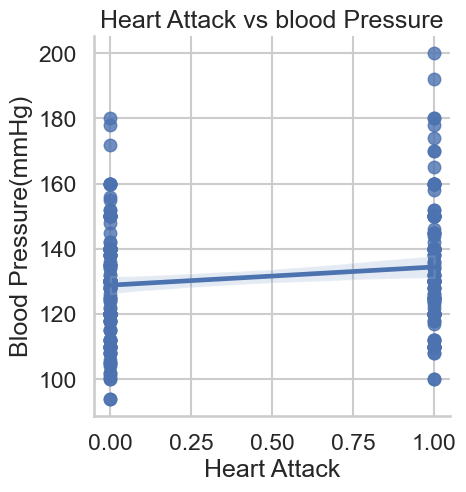

In [215]:
sns.lmplot(x='Heart Attack', y='Blood Pressure(mmHg)', data=Health_dataset)
plt.title('Heart Attack vs blood Pressure')
plt.show()

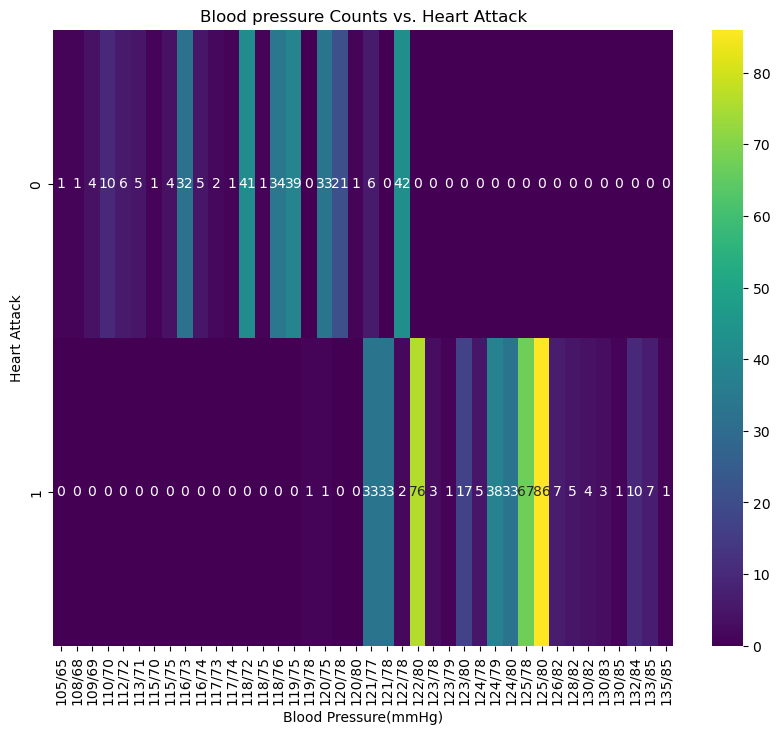

In [37]:
#heatmap_data = Health_dataset.pivot_table(index='Heart Attack', columns='Blood Pressure(mmHg)', aggfunc='size', fill_value=0)

#plt.figure(figsize=(10, 8))
#sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d')  # annot=True to display the counts, fmt='d' to format as integers
#plt.title('Blood pressure Counts vs. Heart Attack')
#plt.xlabel('Blood Pressure(mmHg)')
#plt.ylabel('Heart Attack')
#plt.show()

In [207]:
#plt.figure(figsize=(10, 8))
#sns.scatterplot(x='Gender', y='Cholesterol(mg/dL)', data=Health_dataset)
#plt.title('Cholesterol vs. Gender')
#plt.show()

In [287]:
# calculate correlation matrix
#corr = pd_dataset.corr()# plot the heatmap
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [ ]:
sns.pairplot(pd_dataset)
plt.show()

C:\Users\broda\AppData\Local\Temp\ipykernel_26324\3392734200.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = pd_dataset.corr()


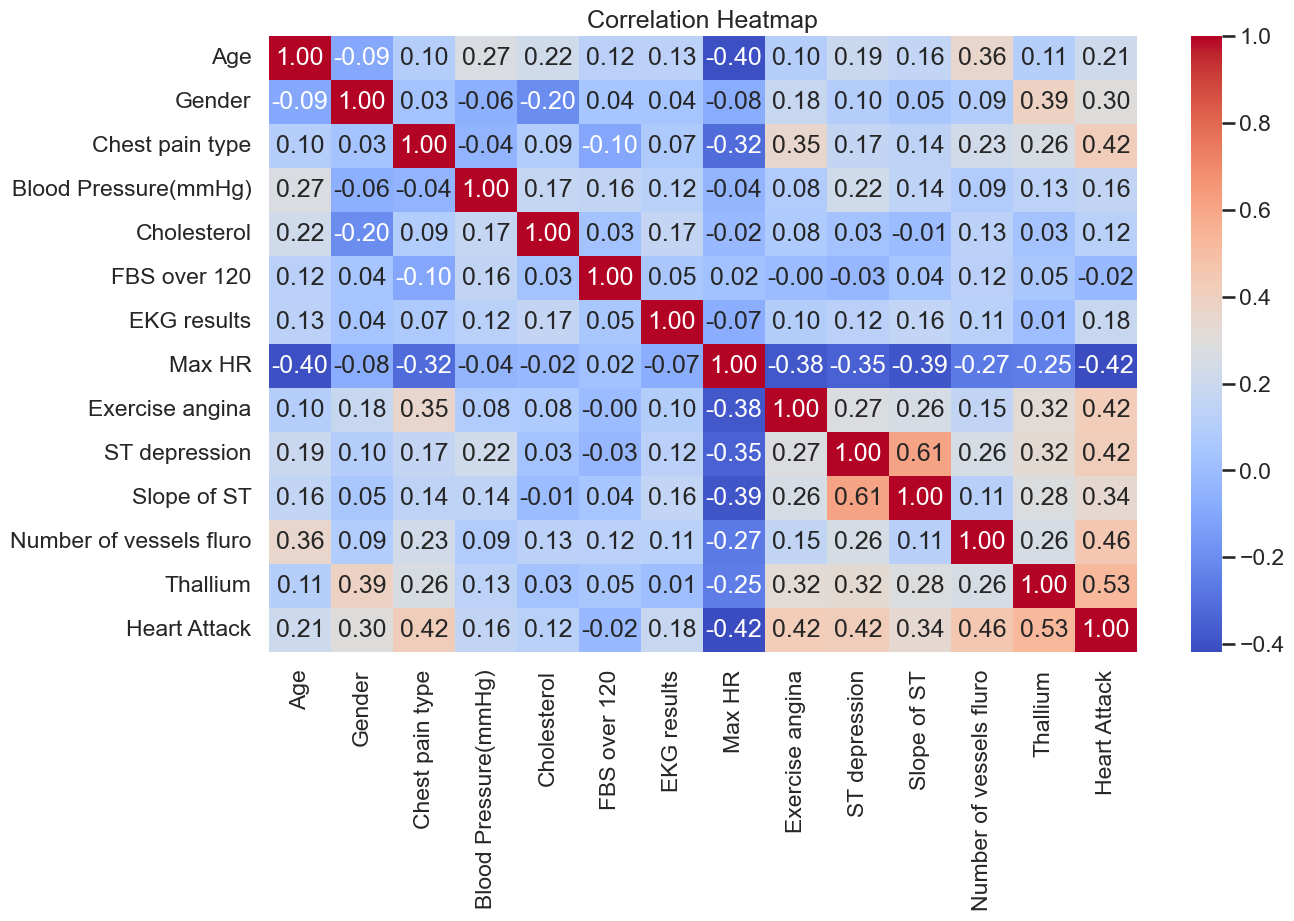

In [286]:
corr = pd_dataset.corr()

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [280]:
pd_dataset = pd.read_csv('health_Heart.csv')

pd_dataset.head(5)



print(pd_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Gender                   270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   Blood Pressure(mmHg)     270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
 14  Heart Attack             2

In [279]:
## Descriptive explorative studies.
print(pd_dataset.columns)

Index(['Age', 'Gender', 'Chest pain type', 'Blood Pressure(mmHg)',
       'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR',
       'Exercise angina', 'ST depression', 'Slope of ST',
       'Number of vessels fluro', 'Thallium', 'Heart Disease', 'Heart Attack'],
      dtype='object')


In [44]:
## preprocessing step 1

## check for missing values in selected columns
## the check_missing_values function checks for missing values in a dataframe column and returns a boolean output.
def check_missing_values(dframe, columnlists):
    for col in columnlists:
        print(f' NAN in {col} : {dframe[col].isna().any()} ')

In [45]:
check_missing_values(pd_dataset, pd_dataset.columns)

pd_dataset = pd_dataset.drop(['ID', 'Name'], axis=1)

 NAN in ID : False 
 NAN in Name : False 
 NAN in Age : False 
 NAN in Gender : False 
 NAN in Height(cm) : False 
 NAN in Weight(kg) : False 
 NAN in Blood Pressure(mmHg) : False 
 NAN in Cholesterol(mg/dL) : False 
 NAN in Glucose(mg/dL) : False 
 NAN in Smoker : False 
 NAN in Exercise(hours/week) : False 
 NAN in Heart Attack : False 


In [46]:
pd_dataset.dtypes

Age                      int64
Gender                  object
Height(cm)               int64
Weight(kg)               int64
Blood Pressure(mmHg)    object
Cholesterol(mg/dL)       int64
Glucose(mg/dL)           int64
Smoker                  object
Exercise(hours/week)     int64
Heart Attack             int64
dtype: object

In [47]:
# Convert all object type to categorical variables
cat_variable = ['Gender', 'Smoker']

In [48]:
for item in cat_variable:
    new_var = 'cat_' + item
    pd_dataset[new_var] = pd_dataset[item]
    pd_dataset[new_var] = pd_dataset[new_var].astype('category')

In [49]:
cat_columns = pd_dataset.select_dtypes(['category']).columns
cat_columns
pd_dataset[cat_columns] = pd_dataset[cat_columns].apply(lambda x: x.cat.codes)

In [50]:
# pd_dataset = pd_dataset.drop(pd_dataset[(pd_dataset['Heart Attack'] == 0) | (pd_dataset['Heart Attack'] == 1)].index)

In [51]:
pd_dataset.head(5)

,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,cat_Gender,cat_Smoker
0,45,Male,175,80,120/80,200,90,No,3,0,1,0
1,35,Female,160,65,110/70,180,80,No,2,0,0,0
2,55,Male,180,85,130/85,220,95,Yes,4,1,1,1
3,40,Female,165,70,115/75,190,85,No,3,0,0,0
4,50,Male,170,75,125/80,210,92,Yes,2,1,1,1


In [52]:
def divide_bp(ele):
    x, y = ele.split('/')
    val = int(x)/int(y)
    return val

In [53]:
pd_dataset['bp_float'] = pd_dataset['Blood Pressure(mmHg)'].apply(lambda x: divide_bp(x))

In [54]:
pd_dataset.shape

pd.value_counts(pd_dataset.dtypes)

int64      7
object     3
int8       2
float64    1
dtype: int64

In [55]:
pd_dataset.select_dtypes(exclude="number").head()

,Gender,Blood Pressure(mmHg),Smoker
0,Male,120/80,No
1,Female,110/70,No
2,Male,130/85,Yes
3,Female,115/75,No
4,Male,125/80,Yes


In [56]:
# Description summary for object type.
pd_dataset.describe(exclude="number")

,Gender,Blood Pressure(mmHg),Smoker
count,724,724,724
unique,2,40,2
top,Male,125/80,No
freq,362,86,376


In [236]:
#plt.figure(figsize=(15, 8))
#relations = pd_dataset.corr()
#sns.heatmap(data=relations, annot=True)

In [235]:
#sns.displot(pd_dataset, x="bp_float")

In [59]:
# Implementing training and test split
from sklearn.model_selection import train_test_split
from sklearn import svm

#  Use Heart_Health.csv dataset as a model validation dataset.

In [241]:
#pd_dataset_old = pd.read_csv('Heart_health.csv')

In [242]:
#pd_dataset_old.head(5)

,ID,Name,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,1,John Doe,45,Male,175,80,120/80,200,90,No,3,0
1,2,Jane Smith,35,Female,160,65,110/70,180,80,No,2,0
2,3,Michael Johnson,55,Male,180,85,130/85,220,95,Yes,4,1
3,4,Sarah Brown,40,Female,165,70,115/75,190,85,No,3,0
4,5,David Lee,50,Male,170,75,125/80,210,92,Yes,2,1


# Implement model training and testing using the Heart_Disease_Prediction.csv dataset.

In [243]:
pd_dataset = pd.read_csv('Heart_Disease_Prediction.csv')

In [244]:
print(pd_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [245]:
# Convert all object type to categorical variables
cat_variable = ['Heart Disease']

for item in cat_variable:
    new_var = 'cat_' + item
    pd_dataset[new_var] = pd_dataset[item]
    pd_dataset[new_var] = pd_dataset[new_var].astype('category')

In [246]:
cat_columns = pd_dataset.select_dtypes(['category']).columns
cat_columns
pd_dataset[cat_columns] = pd_dataset[cat_columns].apply(lambda x: x.cat.codes)

In [247]:
# Preview label balance
pd_dataset['cat_Heart Disease'].value_counts()

0    150
1    120
Name: cat_Heart Disease, dtype: int64

# Label spread - Target column seems quite balance with a spread ratio of 44.4% : 55.5%

# Extracting features and label

In [248]:
# Define exclusion variable object
exclusion_var = ['cat_Heart Disease', 'Heart Disease']

In [249]:
X, y = pd_dataset.drop(exclusion_var, axis=1), pd_dataset['cat_Heart Disease']

In [250]:
X.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [251]:
y.head(5)

0    1
1    0
2    1
3    0
4    0
Name: cat_Heart Disease, dtype: int8

# Implementing training and test split

In [252]:
from sklearn.model_selection import train_test_split

# train dataset at 75% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

# Featuring engineering, implementing data normalization.

In [254]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler to training data and transform
X_train = scaler.fit_transform(X_train)

# Fit test data using using scaler fitted on the training data
X_test = scaler.transform(X_test)

## Modelling Implementation

### Logistics regression

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Implementing simple logistic regression modelling
logistic_model = LogisticRegression(max_iter=300)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [256]:
# Implement test data prediction
logistic_predict = logistic_model.predict(X_test)

In [257]:
# Run classification report and confusion matrix
print(confusion_matrix(y_test, logistic_predict))
print(classification_report(y_test, logistic_predict))

[[28  6]
 [ 9 25]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        34
           1       0.81      0.74      0.77        34

    accuracy                           0.78        68
   macro avg       0.78      0.78      0.78        68
weighted avg       0.78      0.78      0.78        68



#### Implement Logistic Modelling with regularization and cross-validation

In [258]:
from sklearn.linear_model import LogisticRegressionCV

logreg_l2 = LogisticRegressionCV(Cs=10, cv=6, penalty='l2').fit(X_train, y_train)

# Predict values for the testing data
l2_predict = logreg_l2.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, l2_predict))
print(classification_report(y_test, l2_predict))

[[28  6]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        34
           1       0.81      0.76      0.79        34

    accuracy                           0.79        68
   macro avg       0.80      0.79      0.79        68
weighted avg       0.80      0.79      0.79        68



##### Validate result consistency with a KNN Model

In [259]:
# @ K = 4
from sklearn.neighbors import KNeighborsClassifier

# Training and fitting a KNN model on the training set
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Predict values for the testing data
knn_predict = knn.predict(X_test)

# Model evaluation
print(confusion_matrix(y_test, knn_predict))
print(classification_report(y_test, knn_predict))

[[30  4]
 [11 23]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        34
           1       0.85      0.68      0.75        34

    accuracy                           0.78        68
   macro avg       0.79      0.78      0.78        68
weighted avg       0.79      0.78      0.78        68



##### Checking for best K value

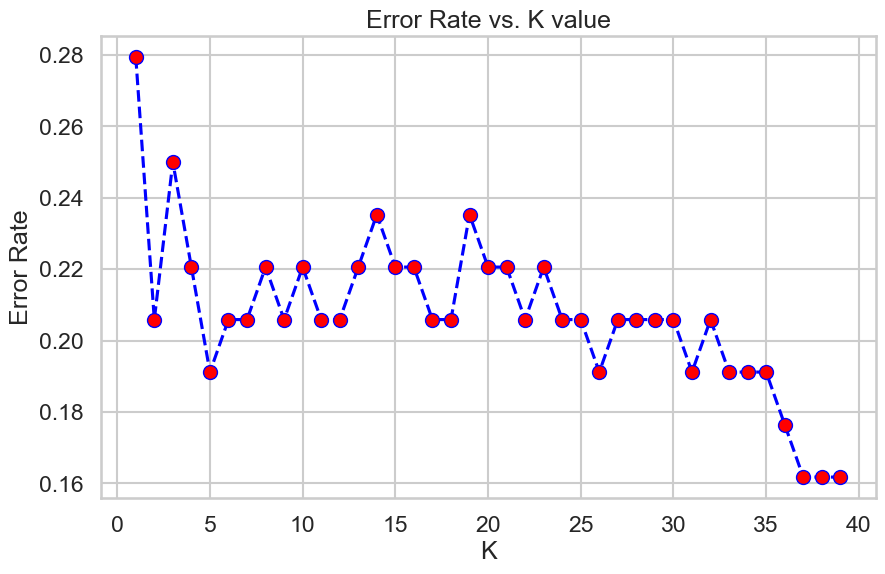

In [260]:
error_rate = []

# Iterate through different values of K
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    knn_predict_i = knn.predict(X_test)
    
    error_rate.append(np.mean(knn_predict_i != y_test))
# Plot the error rates as against the K values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [261]:
# Re-training the above KNN with the best K value = 40
# @ K = 40
from sklearn.neighbors import KNeighborsClassifier

# Training and fitting a KNN model on the training set
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)

# Predict values for the testing data
knn_predict = knn.predict(X_test)

# Model evaluation
print(confusion_matrix(y_test, knn_predict))
print(classification_report(y_test, knn_predict))

[[31  3]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        34
           1       0.90      0.76      0.83        34

    accuracy                           0.84        68
   macro avg       0.85      0.84      0.84        68
weighted avg       0.85      0.84      0.84        68



### Result comparising with Support Vector Machine.

In [262]:
from sklearn.svm import SVC

# Initiate and fit a SVC model
svc = SVC()
svc.fit(X_train, y_train.values.ravel())

# Make prediction on the test data
svc_predict = svc.predict(X_test)

# Model evaluation
print(confusion_matrix(y_test, svc_predict))
print(classification_report(y_test, svc_predict))

[[27  7]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        34
           1       0.79      0.76      0.78        34

    accuracy                           0.78        68
   macro avg       0.78      0.78      0.78        68
weighted avg       0.78      0.78      0.78        68



# ## NOTE: Referencing the above result comparisim across various tested model, the KNN model with a best K value at 40 gives the better predicitive result when compared to the rest of thr models.